In [590]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import requests
from bs4 import BeautifulSoup
import copy 
from pandas.plotting import scatter_matrix 

In [1]:
### Load Table Up
restaurant_df = pd.read_pickle("Datasets/restaurant_clean_df_pickle.pkl")
restaurant_df[["Rating", "Number of Rating", "Price Tier", "Average Menu Length", "Average Item Price"]].describe()

NameError: name 'pd' is not defined

In [496]:
corr_matrix = restaurant_df.corr() 
corr_matrix["Rating"].sort_values(ascending=False)

Rating                 1.000000
Number of Rating       0.342381
Average Menu Length    0.098667
Longitude              0.089894
Average Item Price     0.073766
Latitude              -0.037893
Division              -0.044600
Price Tier            -0.053621
Name: Rating, dtype: float64

In [517]:
rating_bin = list(np.arange(0,10.5,0.5) )
rating_label = list(np.arange(20) )

In [522]:
restaurant_df.groupby("Rating_cat").size()

Rating_cat
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       1
10      2
11     12
12     41
13     64
14    109
15    665
16    129
17     83
18     19
19      0
dtype: int64

In [13]:
count = 0 
state_track = {} 

for i in range(restaurant_df.shape[0]) : 
    
    if restaurant_df.iloc[i]["Menu Item"] != [] : 
        state = restaurant_df.iloc[i]["State"]
        
        if state not in state_track : 
            state_track[state] = 1 
        else : 
            state_track[state] += 1 
            
        count += 1 

print(count)
print(restaurant_df.shape[0])
print(state_track)

207
1132
{'MA': 14, 'CT': 3, 'RI': 3, 'NJ': 4, 'NY': 6, 'PA': 4, 'IL': 2, 'OH': 9, 'IN': 11, 'KS': 2, 'MO': 5, 'NE': 2, 'NC': 14, 'SC': 5, 'FL': 4, 'AL': 2, 'TN': 13, 'KY': 6, 'TX': 15, 'LA': 14, 'OK': 12, 'NV': 3, 'AZ': 18, 'CO': 14, 'CA': 8, 'HI': 10, 'WA': 4}


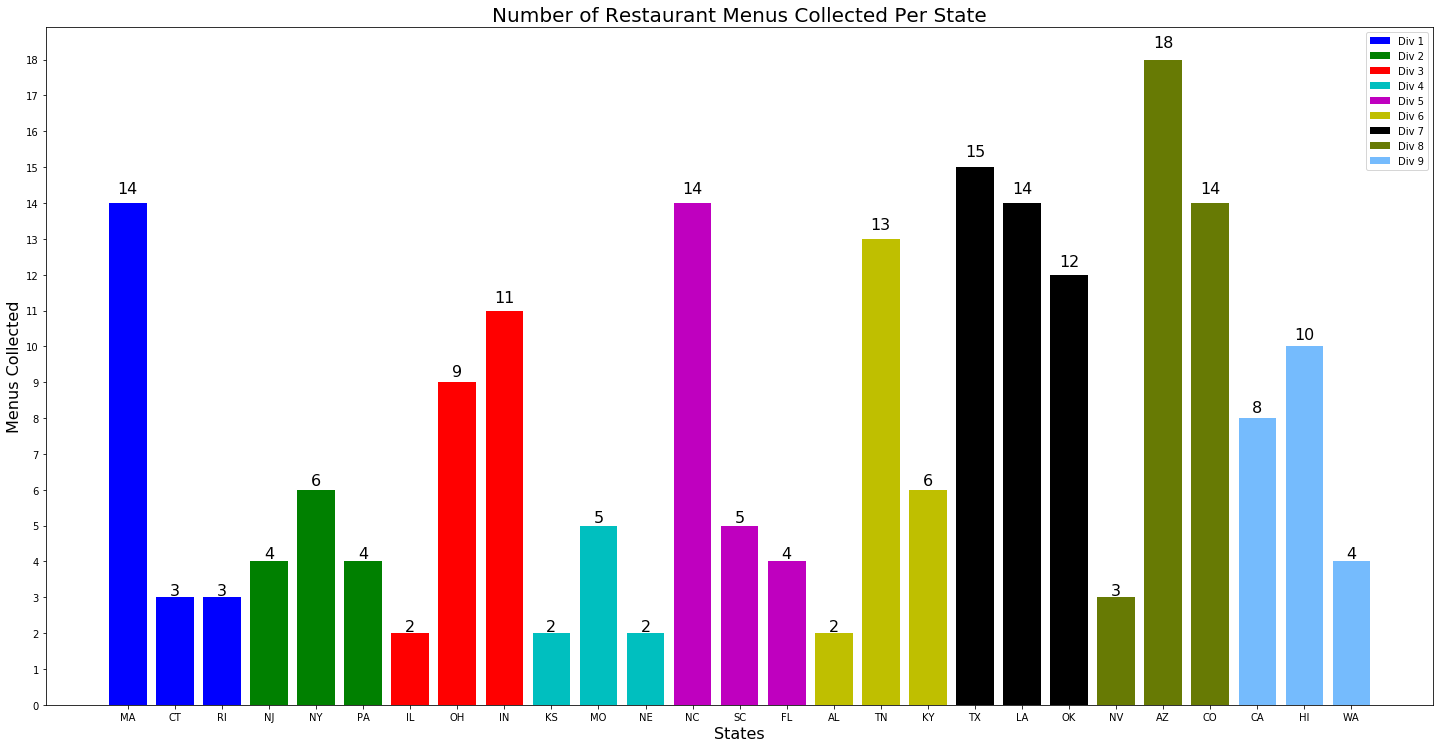

Total Menus Collected: 207
Menus Collected Per Division: [20. 14. 22.  9. 23. 21. 41. 35. 22.]


In [159]:
### Using * unpacks tuples 
x, y = zip( *state_track.items() )
desire_color = []
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'xkcd:olive green', 'xkcd:sky blue']

for state in x : 
    desire_color.append( color_list[ state_capital[state_capital["State"] == state ]["Division"].values[0] - 1] ) 
    
### Figure Properties 
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

### Axis Properties
ax.set_xlabel("States", fontsize=16)
ax.set_ylabel("Menus Collected", fontsize=16)
ax.set_title("Number of Restaurant Menus Collected Per State", fontsize=20)
ax.set_yticks(np.arange(0, max(y)+2, 1.0) )

total_menu = np.zeros( (9,3) )

for i in range( 0,len(x),3 ) : 
    ax.bar(x[i:i+3],y[i:i+3], color= desire_color[i:i+3])
    total_menu[int(i/3), :] = list(y[i:i+3])

ax.legend(['Div 1', 'Div 2', 'Div 3', 'Div 4', 'Div 5', 'Div 6','Div 7', 'Div 8', 'Div 9'] )

### Labeling Axis 
indiv_bar_loc = ax.patches

for ax_loc, val in zip(indiv_bar_loc, y)  : 
    ax.annotate( str(val), xy=(ax_loc.get_x() + ax_loc.get_width()/2, ax_loc.get_height()*1.02), ha="center", fontsize=16 )

## Show Plot 
plt.show()

print("Total Menus Collected:", int(np.sum(total_menu) ) )
print("Menus Collected Per Division:", np.sum(total_menu, axis=1) )

In [233]:
### Making Arrays for Graphs 
result_group = restaurant_df.groupby("State").size().to_dict() 
state_order = np.array(state_capital["State"])


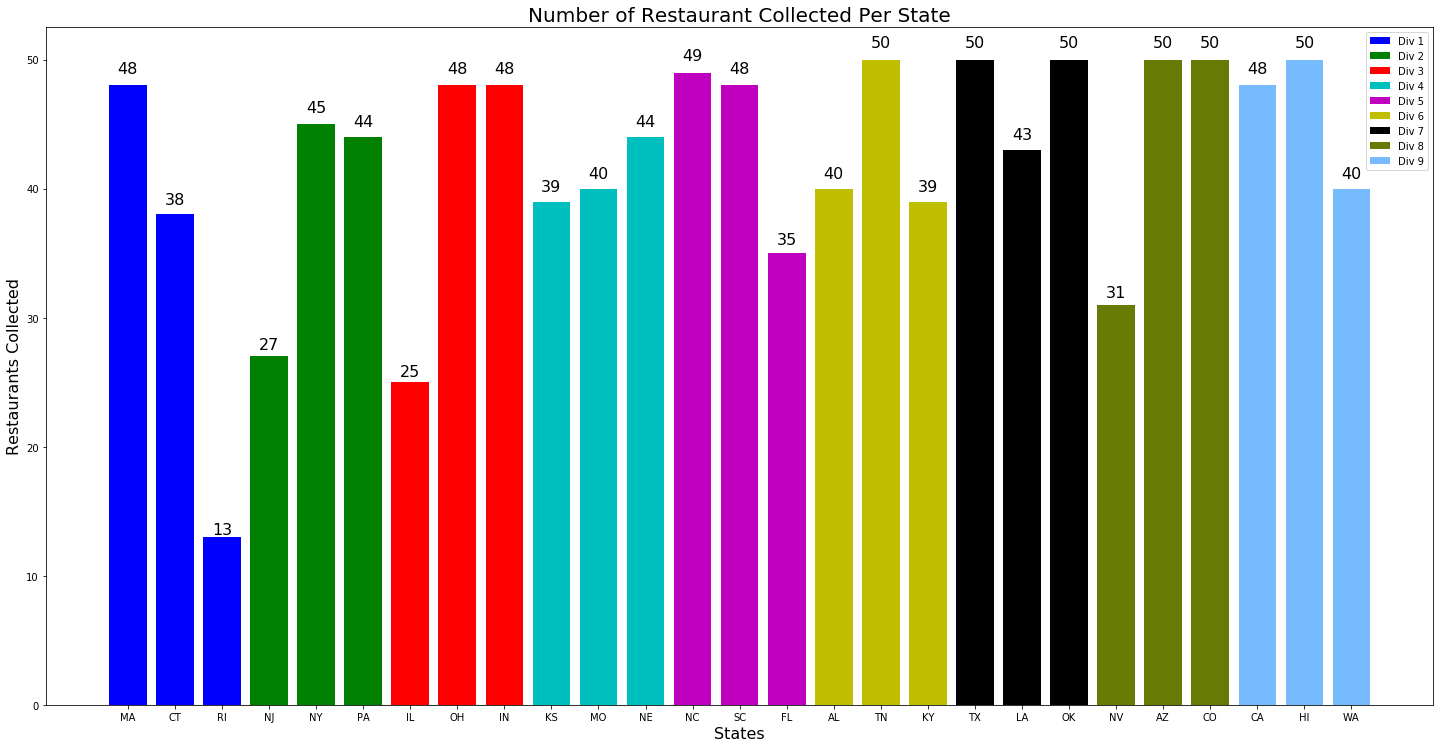

In [710]:
result_group = restaurant_df.groupby("State").size()
count_rest = np.array(result_group)
states = np.array(result_group.index) 

desire_color = []
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'xkcd:olive green', 'xkcd:sky blue']


### Figure Properties 
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

### Axis Properties 
ax.set_xlabel("States", fontsize=16)
ax.set_ylabel("Restaurants Collected", fontsize=16)
ax.set_title("Number of Restaurant Collected Per State", fontsize=20)

num_rest_track = []

for i in range(0,len(state_order),3 ) : 
    x = state_order[i:i+3]
    y = [ result_group[x[0]], result_group[x[1]], result_group[x[2] ] ]
    num_rest_track = num_rest_track + y 
    
    ax.bar(x, y, color = color_list[ int(i/3)] ) 

ax.legend(['Div 1', 'Div 2', 'Div 3', 'Div 4', 'Div 5', 'Div 6','Div 7', 'Div 8', 'Div 9'] )

### Labeling Axis 
indiv_bar_loc = ax.patches

for ax_loc, val in zip(indiv_bar_loc, num_rest_track)  : 
    ax.annotate( str(val), xy=(ax_loc.get_x() + ax_loc.get_width()/2, ax_loc.get_height()*1.02), ha="center", fontsize=16 )


In [157]:
np.sum(total_menu, axis=1)

array([20., 14., 22.,  9., 23., 21., 41., 35., 22.])

In [686]:
restaurant_df.groupby("Price Tier").size()

Price Tier
Cheap             131
Expensive          16
Moderate          957
Not Available      22
Very Expensive      6
dtype: int64

In [693]:
list(price_result.values() ) 

[131, 957, 16, 6]

Text(0, 0.5, 'Number of Restaurant')

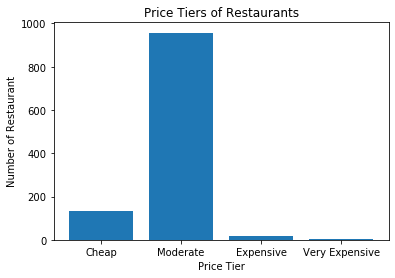

In [697]:
price_result = restaurant_df.groupby("Price Tier").size().to_dict() 

plt.bar(["Cheap", "Moderate", "Expensive", "Very Expensive"], list(price_result.values() ) )
plt.title("Price Tiers of Restaurants")
plt.xlabel("Price Tier")
plt.ylabel("Number of Restaurant")

In [260]:
restaurant_df.groupby("Category Name").size()

Category Name
American Restaurant                 21
Asian Restaurant                     4
BBQ Joint                          959
Bakery                               1
Bar                                 10
Beer Bar                             2
Brazilian Restaurant                 2
Breakfast Spot                       2
Brewery                              5
Building                             1
Burger Joint                         3
Cajun / Creole Restaurant            3
Chinese Restaurant                   1
Churrascaria                         1
Clothing Store                       1
College Classroom                    1
Comfort Food Restaurant              1
Cuban Restaurant                     2
Diner                                5
Dive Bar                             3
Fast Food Restaurant                 4
Filipino Restaurant                  1
Food Truck                           9
General Entertainment                1
Grocery Store                        1
Hawaiian Re

In [177]:
menu_rating = 0 
div_loc = {"Div 1" : 0, "Div 2" : 0, "Div 3" : 0, "Div 4" : 0, "Div 5" : 0, "Div 6" : 0, "Div 7" : 0, "Div 8" : 0, "Div 9" : 0 } 

for i in range(restaurant_df.shape[0]) : 
    
    rest = restaurant_df.iloc[i] 

    if rest["Menu Item"] != [] and rest["Rating"] != -1 : 
        menu_rating += 1
        div_num = state_capital[state_capital["State"] == rest["State"] ]["Division"].values[0]
        div_loc[ "Div " + str(div_num) ] += 1 

print("Total Restaurants that have Menus and Ratings:", menu_rating)
print(div_loc)

Total Restaurants that have Menus and Ratings: 172
{'Div 1': 18, 'Div 2': 10, 'Div 3': 16, 'Div 4': 6, 'Div 5': 21, 'Div 6': 18, 'Div 7': 35, 'Div 8': 31, 'Div 9': 17}


Total Restaurants that have Menus and Ratings: 172


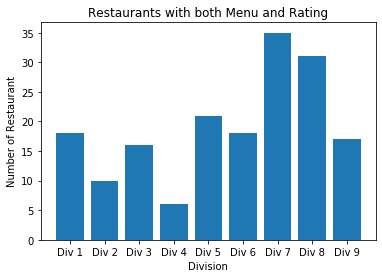

In [708]:
plt.bar(list(div_loc.keys() ), list(div_loc.values() ) )
plt.title("Restaurants with both Menu and Rating")
plt.xlabel("Division")
plt.ylabel("Number of Restaurant")

print("Total Restaurants that have Menus and Ratings:", menu_rating)